In [60]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [35]:
sz = np.array([ [1,0],[0,-1] ] )
sx = np.array( [ [0,1], [1,0] ] )
I = np.eye(2)

def apply_gate( op, exp=False, arg=0 ):
    if op =='X':
        op = sx
    elif op == 'Z':
        op = sz
    if exp is True:
        op = la.expm(-arg*op)
    return op

def compute_hamiltonian( ops , hs ):

    H = 0
    for j in range( len(ops) ) :
        H += hs[j]*apply_gate( ops[j] )

    return H

def variational_state( state_in, ops, fs, params ):

    state_out = state_in
    for j in range(num_params):
        state_out = apply_gate( ops[j], exp=True, arg=params[j]*fs[j] ) @ state_out

    return state_out 

def derivatives_state( state_in, ops, fs, params  ):
    deriv = []
    for i in range(num_params):

        state = state_in
        for j in range(num_params):
            if j == i :
                state = apply_gate( ops[j] ) @ state
            state = apply_gate( ops[j], exp=True, arg=params[j]*fs[j] ) @ state

        deriv.append( state )
    deriv = np.array(deriv)

    return deriv



In [72]:
ops = [ 'Z', 'X'  ]
fs  = [ 1j/2, 1j/2 ]
hs  = [ -1/2, -1/2 ]
num_params = len(ops)
H = compute_hamiltonian(ops, hs)
params = [ 0.1, 1 ]
state_in = np.array([1,0])
H

array([[-0.5, -0.5],
       [-0.5,  0.5]])

In [73]:
state_out = variational_state( state_in, ops, fs, params )
state_out

array([ 0.87648581-0.04386085j, -0.02396129-0.47882638j])

In [74]:
deriv = derivatives_state( state_in, ops, fs, params  )
deriv

array([[ 0.87648581-0.04386085j, -0.02396129-0.47882638j],
       [-0.02396129-0.47882638j,  0.87648581-0.04386085j]])

In [75]:
M = np.real( deriv.conj()@deriv )
M

array([[1., 0.],
       [0., 1.]])

In [76]:
V = np.imag( deriv.conj()@H@state_out )
V

array([ 2.77555756e-17, -4.20735492e-01])

In [77]:
state_out

array([ 0.87648581-0.04386085j, -0.02396129-0.47882638j])

In [78]:
dthetadt = la.solve( M, V )
dthetadt

array([ 2.77555756e-17, -4.20735492e-01])

In [83]:
dt = 1/100
theta = params
thetas = []
states = []
thetas.append( theta.copy() )
states.append( variational_state( state_in, ops, fs, theta )   )

for k in range(10000):
    theta +=  dthetadt*dt
    thetas.append( theta.copy() )
    states.append( variational_state( state_in, ops, fs, theta )   )


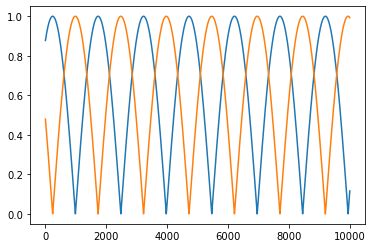

In [84]:
plt.plot( abs(np.array(states) ) )